<a href="https://colab.research.google.com/github/venkataratnamb20/quicksilicon/blob/notebooks/notebooks/templates/icdesign/analog_icdesign_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IC Design

## Setup

### Project Directory

In [7]:
from pathlib import Path

PROJ_DIR = "./projects"

PROJ_DIR = Path(PROJ_DIR)
PROJ_DIR.mkdir(exist_ok=True)

### Install ngspice

In [2]:
!ngspice -v || apt install ngspice

******
** ngspice-36 : Circuit level simulation program
** The U. C. Berkeley CAD Group
** Copyright 1985-1994, Regents of the University of California.
** Copyright 2001-2020, The ngspice team.
** Please get your ngspice manual from http://ngspice.sourceforge.net/docs.html
** Please file your bug-reports at http://ngspice.sourceforge.net/bugrep.html
** Creation Date: Mon Mar 11 21:44:53 UTC 2024
******


### Download Sky130

In [3]:
# get sky130

import os
if not os.path.exists('skywater-pdk-libs-sky130_fd_pr'):
    # spice models
    !git clone https://github.com/google/skywater-pdk-libs-sky130_fd_pr.git

if not os.path.exists('skywater-pdk-libs-sky130_fd_sc_hd'):
    # standardcell definitions
    !git clone https://github.com/google/skywater-pdk-libs-sky130_fd_sc_hd.git


Cloning into 'skywater-pdk-libs-sky130_fd_pr'...
remote: Enumerating objects: 5594, done.
remote: Counting objects: 100% (1704/1704), done.
remote: Compressing objects: 100% (188/188), done.
remote: Total 5594 (delta 1558), reused 1516 (delta 1516), pack-reused 3890 (from 1)
Receiving objects: 100% (5594/5594), 111.43 MiB | 15.59 MiB/s, done.
Resolving deltas: 100% (4833/4833), done.
Updating files: 100% (3820/3820), done.
Cloning into 'skywater-pdk-libs-sky130_fd_sc_hd'...
remote: Enumerating objects: 41249, done.
remote: Total 41249 (delta 0), reused 0 (delta 0), pack-reused 41249 (from 1)
Receiving objects: 100% (41249/41249), 211.86 MiB | 18.80 MiB/s, done.
Resolving deltas: 100% (38730/38730), done.
Updating files: 100% (13114/13114), done.


### ngspice initialization



In [4]:
%%writefile .spiceinit


set ngbehavior=hsa
set ng_nomodcheck


Writing .spiceinit


### Read and plot simulation data with Python

In [39]:

# read and plot data with python
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_tran_data(tran_df,
                   plot_voltages: bool = True,
                   plot_currents: bool = False,
                   plot_all: bool = False
                   ):
    """Plot transient data

    Args:
        tran_df (pd.DataFrame): transient data

    Returns:
        None

    Examples:
        >> plot_tran_data(tran_df)
    """
    if plot_voltages:
        voltage_cols = [col for col in tran_df.columns if col.lower().startswith("v(")]
        tran_df[voltage_cols].plot(subplots=True, figsize=(10, 4))
        plt.title('Voltages')
        plt.show()
    elif plot_currents:
        current_cols = [col for col in tran_df.columns if col.lower().startswith("@")]
        tran_df[current_cols].plot(subplots=True, figsize=(10, 4))
        plt.title('Currents')
        plt.show()
    elif plot_all:
        tran_df.plot(subplots=True, figsize=(12, 8))
        plt.title('Voltages and Currents')
        plt.show()
    else:
        print("No plots selected!")

def read_tran_data(filename: os.PathLike,
                   plot_voltages: bool = True,
                   plot_currents: bool = False,
                   plot_all: bool = False):
    """Read Transient Data in csv format


    """

    data = pd.read_csv(filename, delim_whitespace = True, skip_blank_lines=True )
    data = data.set_index('time')
    plot_tran_data(data, plot_voltages, plot_currents, plot_all)

    return data



## KCL and KVL

### KCL

### KVL

Examples

## Nodal and Mesh Analysis


### Nodal Analysis


### Mesh Analysis


### Examples

## Theorems

**Discuss All Network Theorems, you know**



- Thevinen's Theorem
- Norton's Theorem
- Maximum Power Theorem.


### Thevinen's Theorem

### Norton's Theorem


### Maximum Power Transfer Theorem


### Examples

**Examples for each topic**


## RC Circuits

### RC: : 1st Order

### RC: 2nd Order

# Appendix


## Basic Circuits

### RC Circuit

#### Netlist

In [8]:
rcfilter_dir = PROJ_DIR / "rcfilter"
rcfilter_dir.mkdir(exist_ok=True)

In [13]:
%%writefile "$PROJ_DIR/rcfilter/rc_tb.cir"

* RC LPF
*** Schemtic
.TITLE RC LPF
R1 vin vout 1M
R2 vout 0 1M
C2 vout 0 1p
* V1 <term1> <term2> DC 0 PULSE (<LOW_VOLTAGE> <HIGH_VOLTAGE> <TD> <TR> <TF> <PW> <PERIOD>)
V1 vin 0 DC 0 PULSE (0V 1.8V 1ns 10ps 10ps 1ns 2ns)

*** Control
.CONTROL
tran 10p 4n
option noinit
set wr_singlescale
set wr_vecnames
save all
save @r1[i] @r2[i]
save @c2[i]
run
wrdata rc_tb.csv V(vin) V(vout) @r1[i] @r2[i] @c2[i]
.ENDC
.END


Overwriting projects/rcfilter/rc_tb.cir


#### Run sim

In [14]:
# run sim

!cd "$PROJ_DIR/rcfilter/" && ngspice -b rc_tb.cir



No compatibility mode selected!


Circuit: RC LPF

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
vin                                          0
vout                                         0
v1#branch                                    0


No. of Data Rows : 441
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Note: No ".plot", ".print", or ".fourier" lines; no simulations run


#### Read and Plot Time

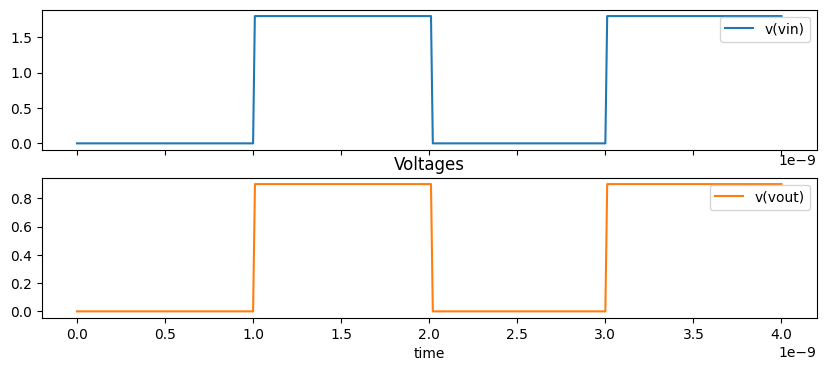

,v(vin),v(vout),@r1[i],@r2[i],@c2[i]
time,,,,,
0.000000e+00,0.0,0.0,0.0,0.0,0.0
1.000000e-13,0.0,0.0,0.0,0.0,0.0
2.000000e-13,0.0,0.0,0.0,0.0,0.0
4.000000e-13,0.0,0.0,0.0,0.0,0.0
8.000000e-13,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
3.964190e-09,1.8,0.9,0.0,0.0,0.0
3.974190e-09,1.8,0.9,0.0,0.0,0.0
3.984190e-09,1.8,0.9,0.0,0.0,0.0


In [40]:
rc_df = read_tran_data(PROJ_DIR / "rcfilter/rc_tb.csv", plot_all=True)

rc_df

#### Plot Currents

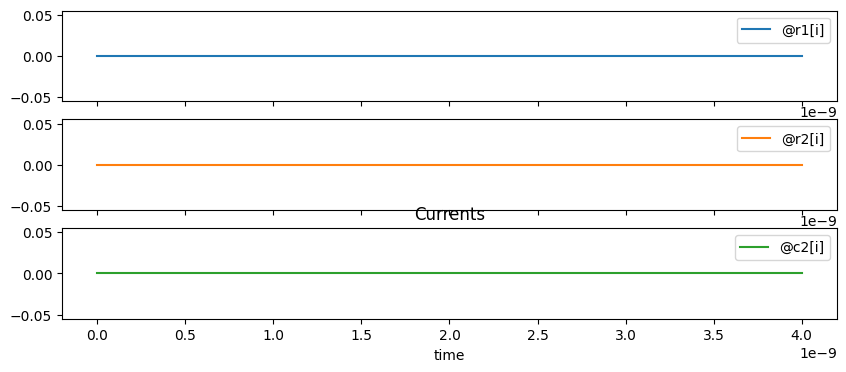

In [42]:

# voltage_cols = [col for col in rc_df.columns if col.lower().startswith("v(")]
# rc_df[voltage_cols].plot(subplots=True, figsize=(10, 4))
# plt.title('Sky130: RC LPF')
# plt.show()

plot_tran_data(rc_df, plot_voltages=False, plot_currents=True)


## Sky130 Examples

